<a href="https://colab.research.google.com/github/souvik25162/ArimaAnnHybrid/blob/master/ARIMA_LSTM%20japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade

In [ ]:
pip install pymc3 --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,StandardScaler
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('switzerland.csv')
df.rename(columns={'LMUNRRTTCHM156S':'values'},inplace=True)
df.head()

Saving switzerland.csv to switzerland (3).csv


,DATE,values
0,01 January 1980,0.242413
1,01 February 1980,0.232299
2,01 March 1980,0.224169
3,01 April 1980,0.216453
4,01 May 1980,0.209024


In [ ]:
#df.rename(columns={'japan':'values'},inplace=True)

In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,values
0,1980-01-01,0.242413
1,1980-02-01,0.232299
2,1980-03-01,0.224169
3,1980-04-01,0.216453
4,1980-05-01,0.209024


Text(0.5, 0, 'date')

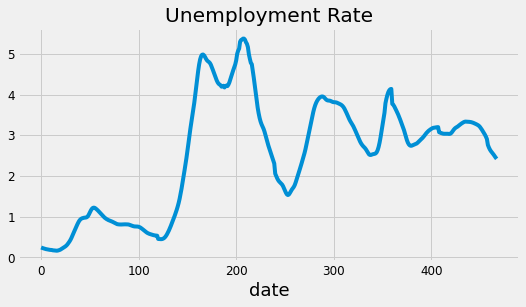

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Unemployment Rate")
plt.plot(df['values'])
plt.xlabel('date',fontsize=18)

In [ ]:
data=df.filter(['values'])

In [ ]:
len(df)

468

In [ ]:
dataset=data.values

In [ ]:
import math
training_datalen=432
print(training_datalen)

432


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
train_data= scaled_data[0:432,:]
time_step=15
test_data= scaled_data[training_datalen-time_step:,:]

In [ ]:
len(test_data)

51

In [ ]:
x_train=[]
y_train=[]
for i in range(time_step,len(train_data)):
  x_train.append(train_data[i-time_step:i,0])
  y_train.append(train_data[i,0])
  if i<=time_step:
    print(x_train)
    print(y_train)
    print()

[array([0.01516997, 0.01322851, 0.01166809, 0.01018697, 0.00876107,
       0.00751532, 0.00648961, 0.00556661, 0.00469431, 0.00393032,
       0.00344716, 0.0031909 , 0.00186406, 0.00135628, 0.0006377 ])]
[6.926419443699372e-05]



In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train.shape

(417, 15)

In [ ]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(417, 15, 1)

In [ ]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=20)

Epoch 1/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0102
Epoch 2/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0024
Epoch 3/20
417/417 [==============================] - 3s 7ms/step - loss: 8.7544e-04
Epoch 4/20
417/417 [==============================] - 3s 7ms/step - loss: 7.2425e-04
Epoch 5/20
417/417 [==============================] - 3s 7ms/step - loss: 4.6616e-04
Epoch 6/20
417/417 [==============================] - 3s 8ms/step - loss: 5.9251e-04
Epoch 7/20
417/417 [==============================] - 3s 7ms/step - loss: 4.4210e-04
Epoch 8/20
417/417 [==============================] - 3s 7ms/step - loss: 3.3412e-04
Epoch 9/20
417/417 [==============================] - 3s 7ms/step - loss: 4.5886e-04
Epoch 10/20
417/417 [==============================] - 3s 7ms/step - loss: 3.1140e-04
Epoch 11/20
417/417 [==============================] - 3s 7ms/step - loss: 3.4889e-04
Epoch 12/20
417/417 [==============================] - 3s 7ms/step - lo

In [ ]:
x_test=[]
y_test= dataset[training_datalen:,:]
for i in range(time_step,len(test_data)):
  x_test.append(test_data[i-time_step:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
pred= model.predict(x_test)
pred1=scaler.inverse_transform(pred)

In [ ]:
len(pred1)

36

In [ ]:
train= data[:training_datalen]
valid=data[training_datalen:]
valid['pred1']=pred1

No handles with labels found to put in legend.


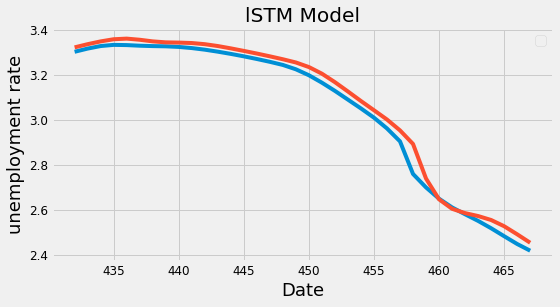

In [ ]:
plt.figure(figsize=(8,4))
plt.title("lSTM Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("unemployment rate",fontsize=18)
plt.plot(valid[['values','pred1']])
plt.legend()
plt.show()

#ARIMA

In [ ]:
ts=df['values']
train=ts[0:432]
test= ts[432:len(ts)]

In [ ]:
len(test)

36

In [ ]:
train=train.values
test=test.values

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


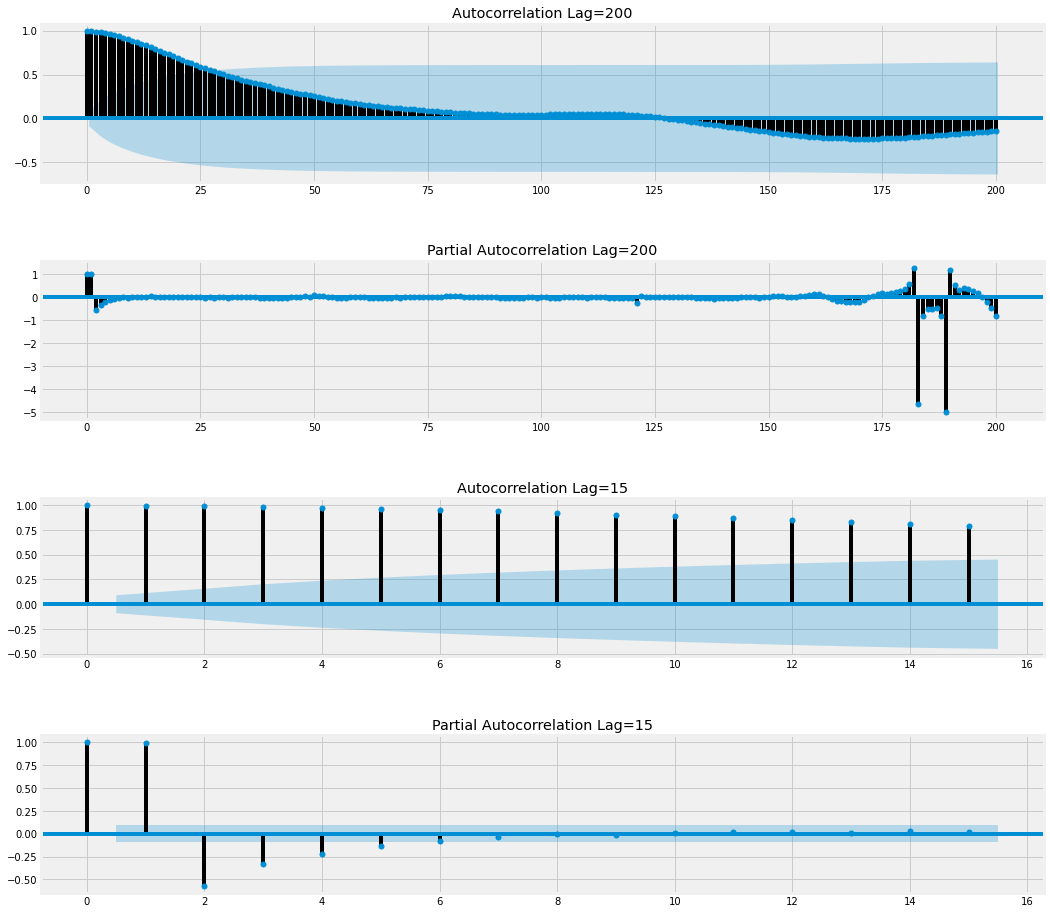

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(df['values'],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(df['values'],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(df['values'],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(df['values'],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(series,mlag =None, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [ ]:
test_stationarity(df['values'])

ADF Test Result
Test Statistic                  -2.303558
p value                          0.170823
used lag                        18.000000
Number of observations used    449.000000
Critical Value 1%               -3.444998
Critical Value 5%               -2.867999
Critical Value 10%              -2.570210
dtype: float64


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [ ]:
history=[x for x in train]
predictions=list()

for t in range(len(test)):
  model=ARIMA(history,order=(4,1,1))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=3.306238, expected=3.304046
predicted=3.319689, expected=3.318223
predicted=3.332184, expected=3.329506
predicted=3.341230, expected=3.334736
predicted=3.342157, expected=3.333757
predicted=3.335660, expected=3.331042
predicted=3.329319, expected=3.329306
predicted=3.326704, expected=3.328327
predicted=3.326301, expected=3.325611
predicted=3.323214, expected=3.320559
predicted=3.316715, expected=3.313438
predicted=3.307676, expected=3.304558
predicted=3.297027, expected=3.294654
predicted=3.285902, expected=3.283815
predicted=3.274156, expected=3.271998
predicted=3.261562, expected=3.259445
predicted=3.248365, expected=3.245558
predicted=3.233559, expected=3.226196
predicted=3.210901, expected=3.199734
predicted=3.179023, expected=3.166729
predicted=3.139752, expected=3.130274
predicted=3.098647, expected=3.091304
predicted=3.056548, expected=3.052223
predicted=3.016493, expected=3.011229
predicted=2.974364, expected=2.963357
predicted=2.922564, expected=2.905915
predicted=2.

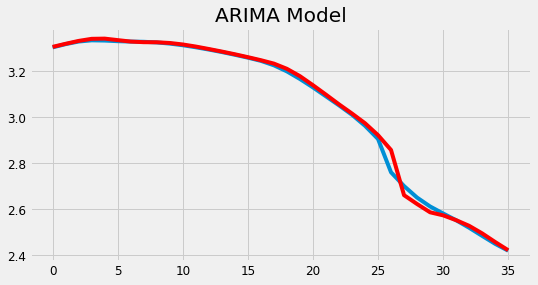

In [ ]:
plt.figure(figsize=(8,4))
plt.title("ARIMA Model")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ERROR FOR ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.00038436034384001016
RMSE: 0.019605110146082072


FOR LSTM

In [ ]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,pred1)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.0013405078108295883
RMSE: 0.03661294594579338


#HYBRID # ARIMA-LSTM


In [ ]:
NEW_PREDICTION= (pred1+predictions)/2

In [ ]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,NEW_PREDICTION)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.0006703920564340881
RMSE: 0.025891930334258358


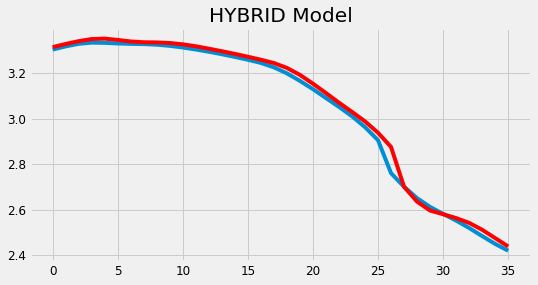

In [ ]:
plt.figure(figsize=(8,4))
plt.title("HYBRID Model")
plt.plot(test)
plt.plot(NEW_PREDICTION, color='red')
plt.show()